# Imports

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD

# Loading mnist Dataset

In [2]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(f"Training Dataset shape: {x_train.shape}")
print(f"Testing Dataset shape: {x_test.shape}")

Training Dataset shape: (60000, 28, 28)
Testing Dataset shape: (10000, 28, 28)


# Data Preprocessing

In [3]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [4]:
# convert class vectors to binary class matrices
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Building the Model

In [6]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))

model.add(Dense(10, activation='softmax'))

In [7]:
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(learning_rate=0.01, momentum=0.9),
              metrics=['accuracy'])

# Training

In [8]:
history = model.fit(x_train, 
                    y_train,
                    batch_size=128,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 69s 145ms/step - loss: 0.1962 - accuracy: 0.9400 - val_loss: 0.0629 - val_accuracy: 0.9819
Epoch 2/10
469/469 [==============================] - 69s 148ms/step - loss: 0.0583 - accuracy: 0.9823 - val_loss: 0.0450 - val_accuracy: 0.9858
Epoch 3/10
469/469 [==============================] - 77s 163ms/step - loss: 0.0428 - accuracy: 0.9863 - val_loss: 0.0383 - val_accuracy: 0.9882
Epoch 4/10
469/469 [==============================] - 107s 229ms/step - loss: 0.0327 - accuracy: 0.9900 - val_loss: 0.0318 - val_accuracy: 0.9899
Epoch 5/10
469/469 [==============================] - 97s 206ms/step - loss: 0.0258 - accuracy: 0.9918 - val_loss: 0.0358 - val_accuracy: 0.9885
Epoch 6/10
469/469 [==============================] - 94s 199ms/step - loss: 0.0224 - accuracy: 0.9931 - val_loss: 0.0337 - val_accuracy: 0.9891
Epoch 7/10
469/469 [==============================] - 86s 183ms/step - loss: 0.0182 - accuracy: 0.9945 - val_loss: 0.0327 - val_a

# Plotting 

In [9]:
import matplotlib.pyplot as plt

train_acc = history.history['accuracy']
train_loss = history.history['loss']

val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(1, len(train_acc)+1)

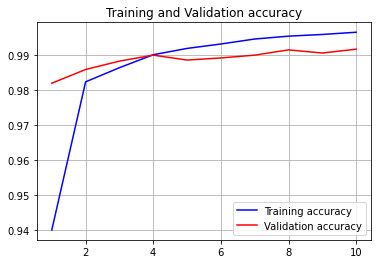

In [10]:
plt.plot(epochs, train_acc, "b", label="Training accuracy")
plt.plot(epochs, val_acc, "r", label="Validation accuracy")
plt.legend()
plt.title("Training and Validation accuracy")
plt.grid(True)

plt.show()

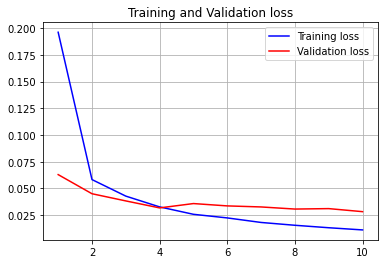

In [11]:
plt.plot(epochs, train_loss, "b", label="Training loss")
plt.plot(epochs, val_loss, "r", label="Validation loss")
plt.legend()
plt.title("Training and Validation loss")
plt.grid(True)

plt.show()

# Evaluating the model on the testing Data

In [12]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

Test loss:  0.028261303901672363
Test accuracy:  0.991599977016449


# Saving the model for Later Use

In [13]:
model.save('mnist_model.h5')
print("Model Saved!")

Model Saved!
